In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-traffic-accidents/RTA Dataset.csv
/kaggle/input/road-traffic-accidents/cleaned.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv('/kaggle/input/road-traffic-accidents/RTA Dataset.csv')  
# Load dataset
df.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
print("Null values per column:\n", df.isnull().sum())

Null values per column:
 Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Wor

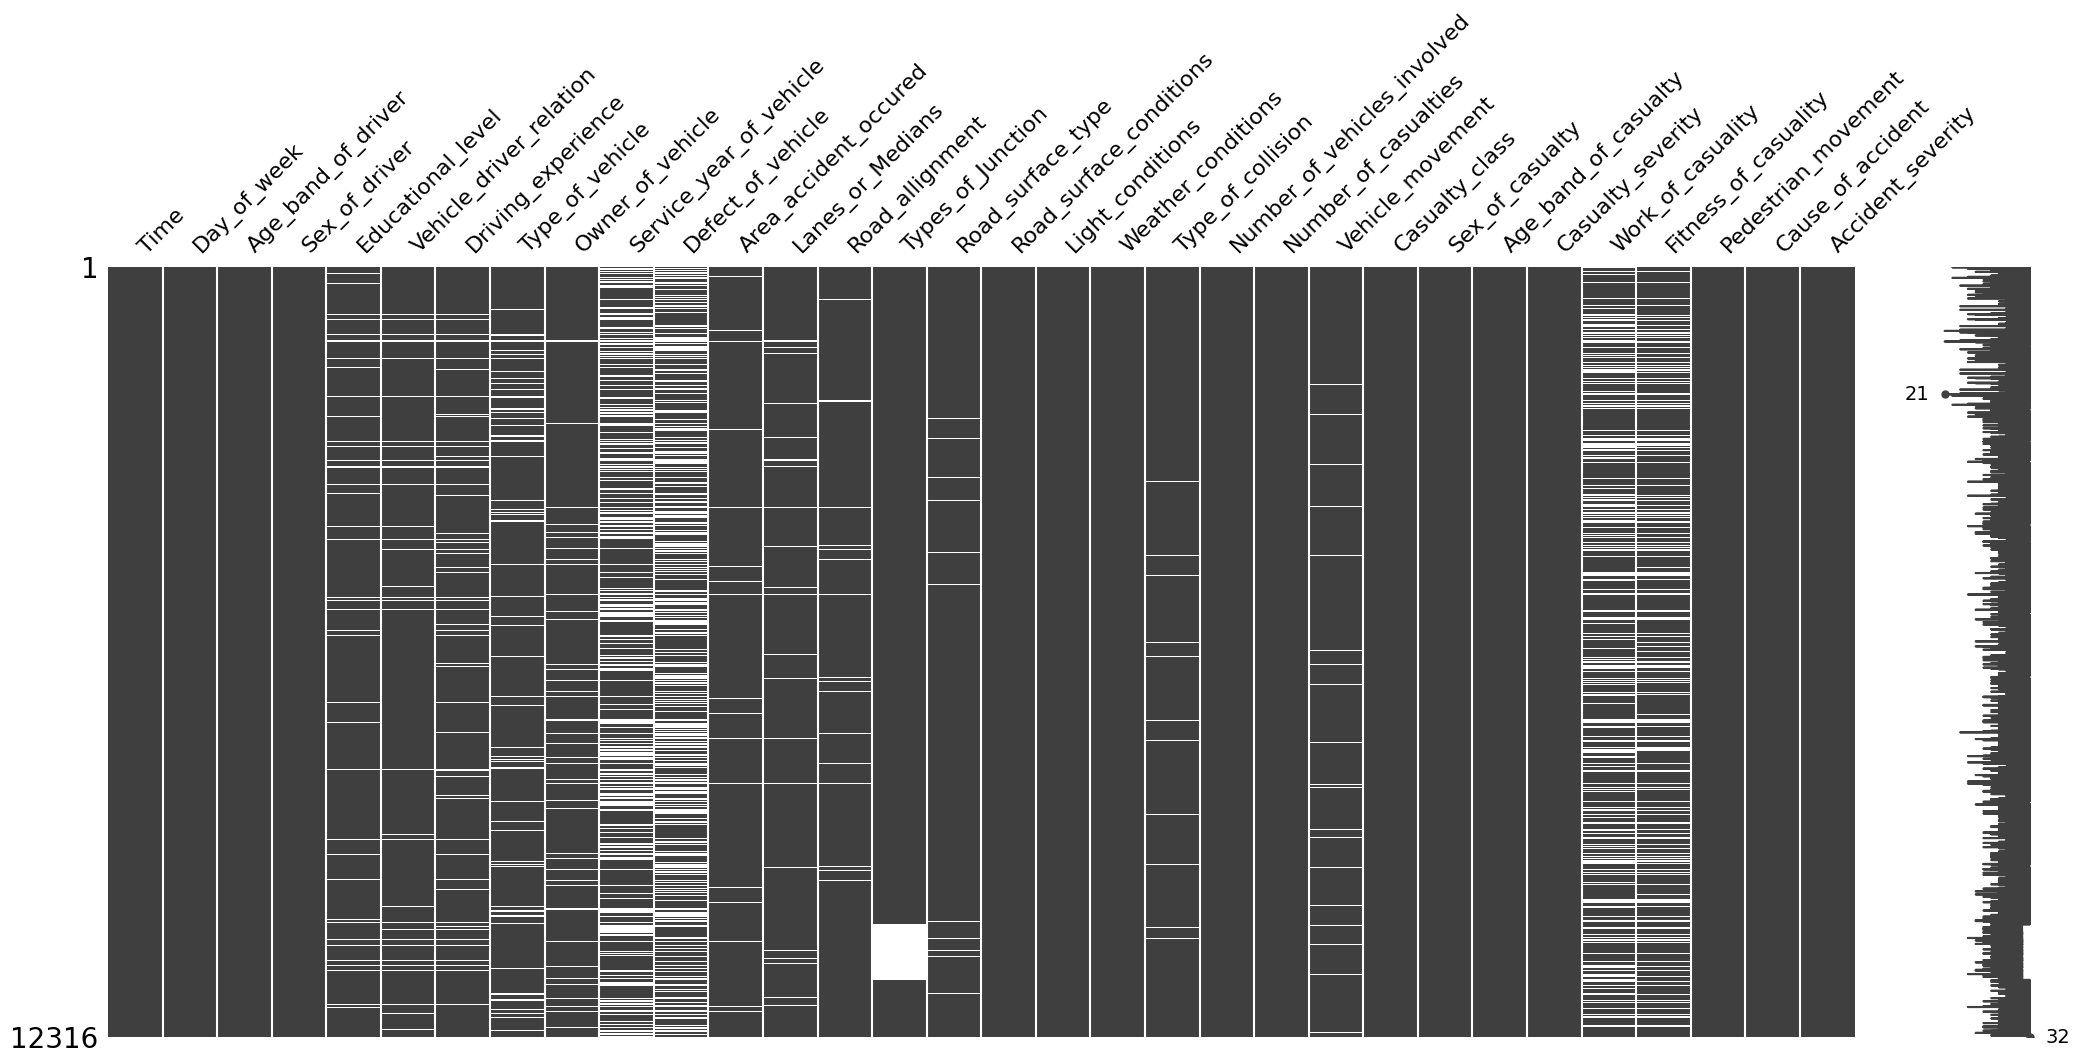

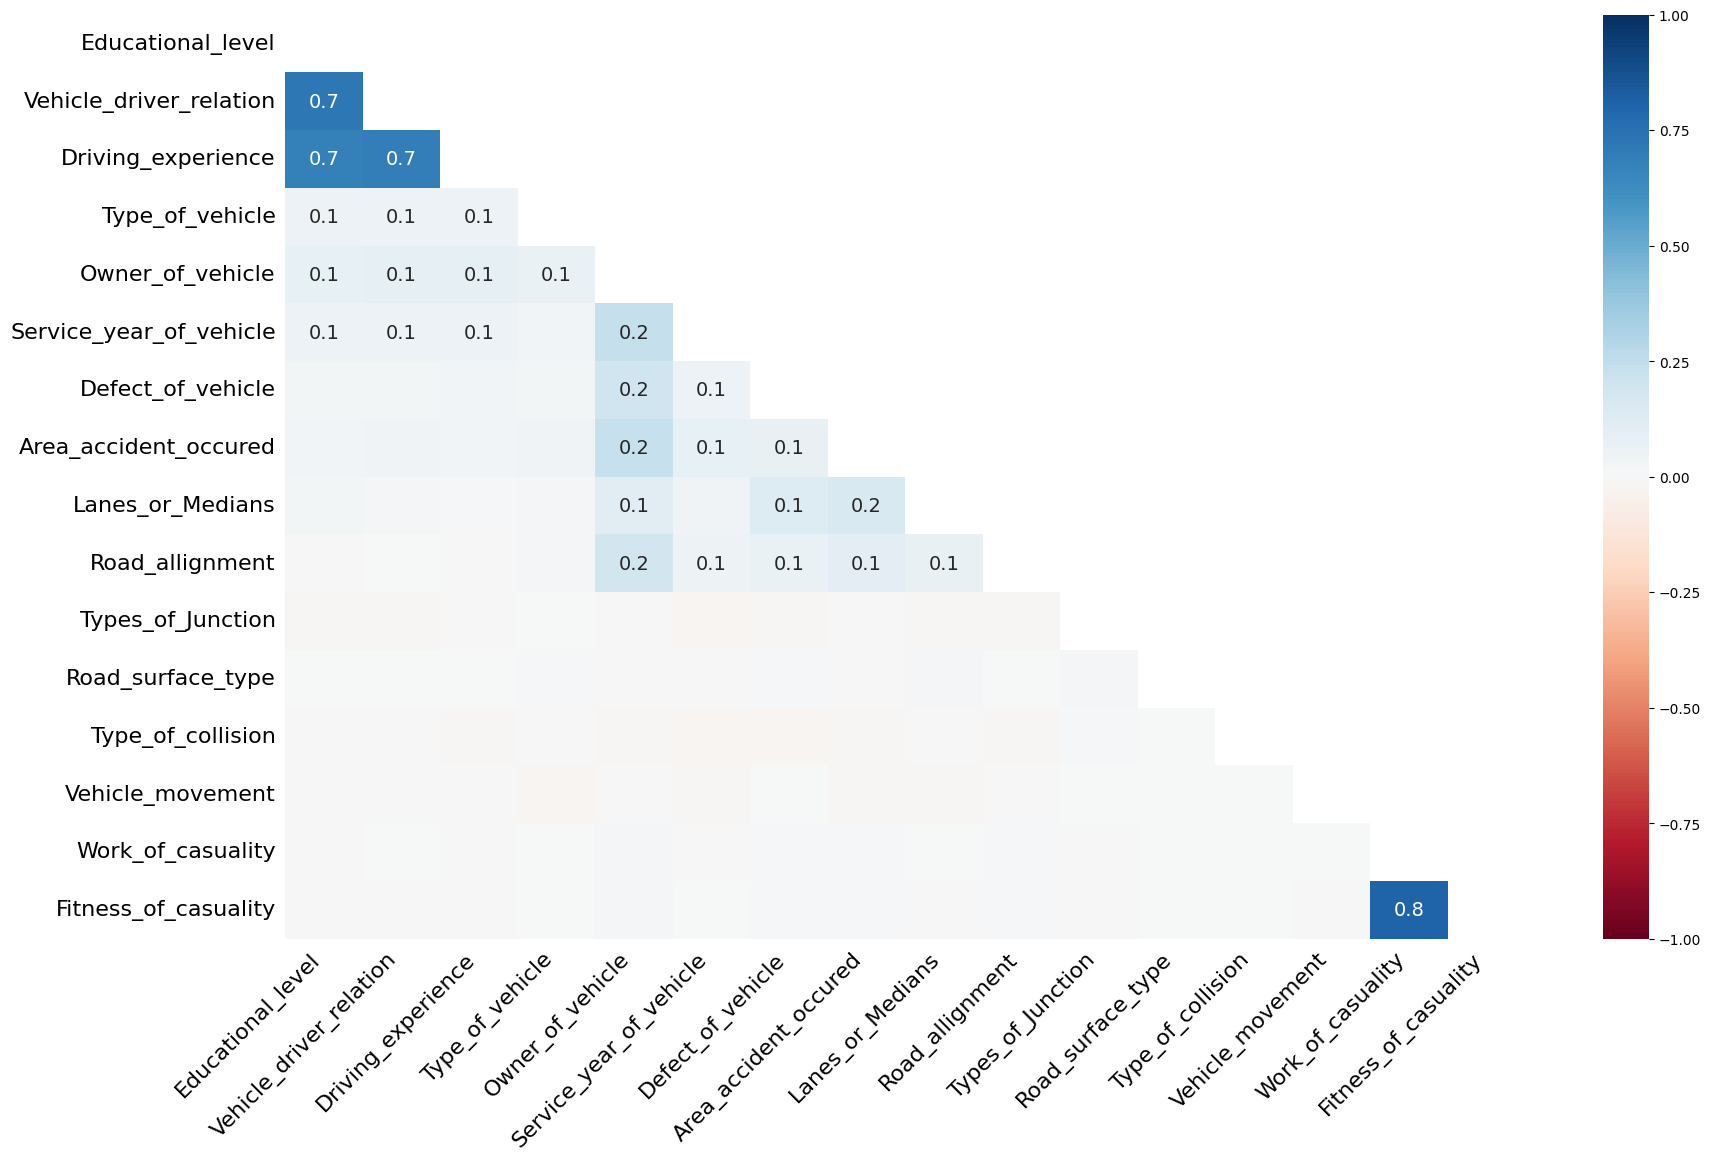

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()
msno.heatmap(df)
plt.show()

In [7]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


In [8]:
#Categorical Columns: Mode Imputation
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
print("Null values per column:\n", df.isnull().sum())

Null values per column:
 Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movemen

In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print categorical columns
print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [11]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

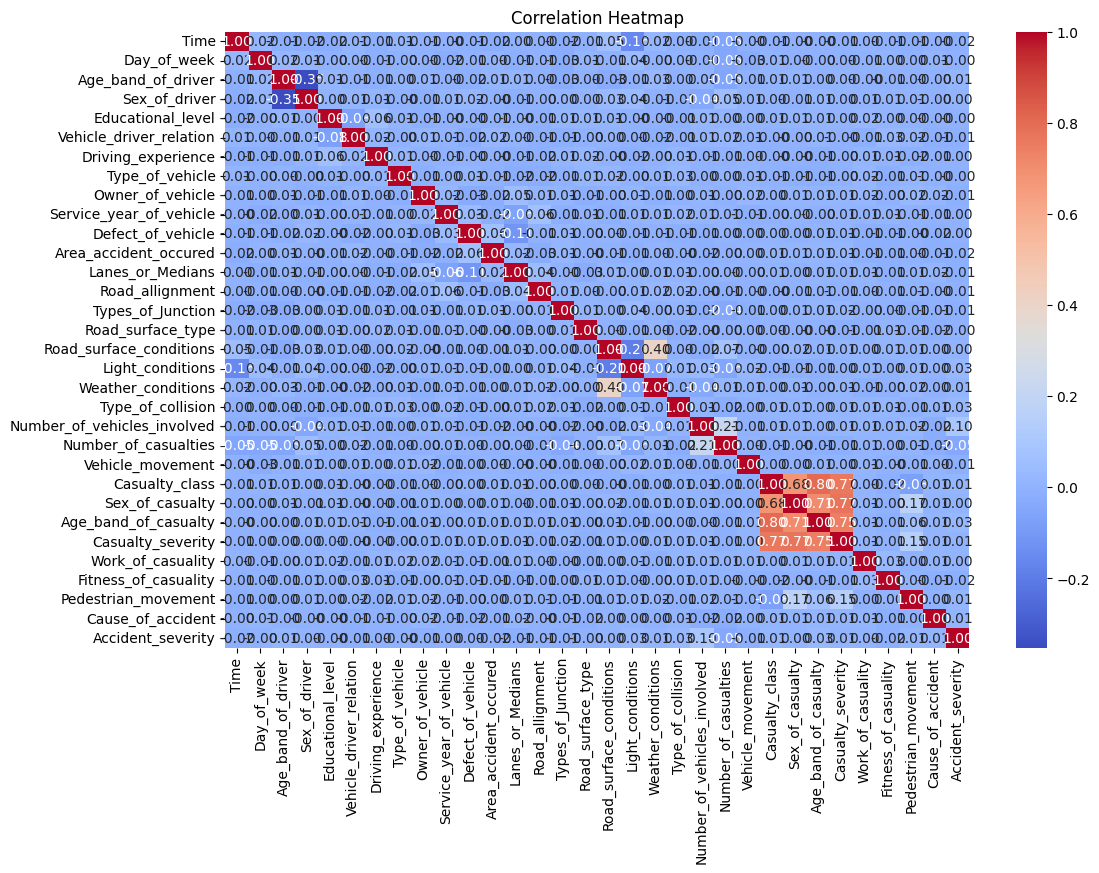

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
class_count = df["Accident_severity"].value_counts()
class_count

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64

In [14]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,420,1,0,1,0,0,0,0,3,3,...,2,3,2,5,3,0,2,5,9,2
1,420,1,1,1,4,0,3,11,3,2,...,2,3,2,5,3,0,2,5,16,2
2,420,1,0,1,4,0,0,5,3,5,...,2,0,1,1,2,0,2,5,0,1
3,594,3,0,1,4,0,2,11,0,5,...,2,2,0,0,2,0,2,5,1,2
4,594,3,0,1,4,0,1,0,3,2,...,2,3,2,5,3,0,2,5,16,2


In [15]:
# Splitting the dataset
X = df.drop(['Accident_severity'], axis=1)
y = df['Accident_severity']

In [16]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [17]:
# Splitting datasets for imbalance and balance cases
X_train_imbalance, X_test_imbalance, y_train_imbalance, y_test_imbalance = train_test_split(X, y, test_size=0.2, random_state=30)
X_train_balance, X_test_balance, y_train_balance, y_test_balance = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=30)

In [18]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGB Classifier": XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    "CatBoost Classifier": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM Classifier": LGBMClassifier(random_state=42)
}

In [19]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return cm, accuracy, report, f1, precision, recall

In [20]:
results = {}
confusion_matrices = {"Imbalanced": {}, "Balanced": {}}
comparison_table = []

for model_name, model in models.items():
    print(f"Training {model_name} on imbalanced data...")
    model.fit(X_train_imbalance, y_train_imbalance)
    cm_imbalance, accuracy_imbalance, _, f1_imbalance, precision_imbalance, recall_imbalance = evaluate_model(model, X_test_imbalance, y_test_imbalance)
    confusion_matrices["Imbalanced"][model_name] = cm_imbalance

    print(f"Training {model_name} on balanced data...")
    model.fit(X_train_balance, y_train_balance)
    cm_balance, accuracy_balance, _, f1_balance, precision_balance, recall_balance = evaluate_model(model, X_test_balance, y_test_balance)
    confusion_matrices["Balanced"][model_name] = cm_balance

    comparison_table.append({
        "Model": model_name,
        "Accuracy (Imbalanced)": accuracy_imbalance,
        "Accuracy (Balanced)": accuracy_balance,
        "F1 Score (Imbalanced)": f1_imbalance,
        "F1 Score (Balanced)": f1_balance,
        "Precision (Imbalanced)": precision_imbalance,
        "Precision (Balanced)": precision_balance,
        "Recall (Imbalanced)": recall_imbalance,
        "Recall (Balanced)": recall_balance
    })

Training Random Forest on imbalanced data...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Training Random Forest on balanced data...
Training Logistic Regression on imbalanced data...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Training Logistic Regression on balanced data...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Decision Tree on imbalanced data...
Training Decision Tree on balanced data...
Training Gradient Boosting on imbalanced data...
Training Gradient Boosting on balanced data...
Training AdaBoost on imbalanced data...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Training AdaBoost on balanced data...
Training K-Nearest Neighbors on imbalanced data...
Training K-Nearest Neighbors on balanced data...
Training SVM on imbalanced data...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Training SVM on balanced data...
Training Gaussian Naive Bayes on imbalanced data...
Training Gaussian Naive Bayes on balanced data...
Training XGB Classifier on imbalanced data...
Training XGB Classifier on balanced data...
Training CatBoost Classifier on imbalanced data...
Training CatBoost Classifier on balanced data...
Training LightGBM Classifier on imbalanced data...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 470
[LightGBM] [Info] Number of data points in the train set: 9852, number of used features: 31
[LightGBM] [Info] Start training from score -4.383245
[LightGBM] [Info] Start training from score -1.947637
[LightGBM] [Info] Start training from score -0.168532
Training LightGBM Classifier on balanced data...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the 

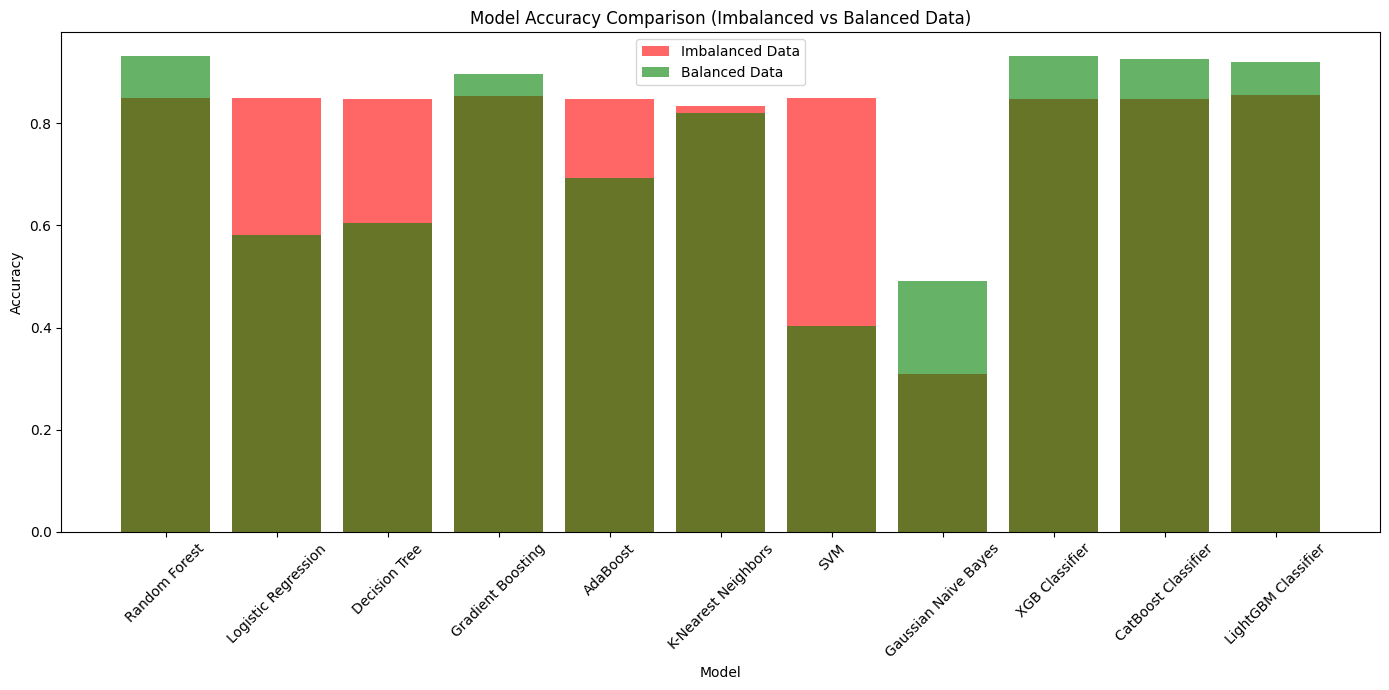

In [21]:
# Accuracy comparison plot for imbalanced and balanced data
plt.figure(figsize=(14, 7))
plt.bar([x['Model'] for x in comparison_table], [x['Accuracy (Imbalanced)'] for x in comparison_table], color='red', alpha=0.6, label='Imbalanced Data')
plt.bar([x['Model'] for x in comparison_table], [x['Accuracy (Balanced)'] for x in comparison_table], color='green', alpha=0.6, label='Balanced Data')
plt.title('Model Accuracy Comparison (Imbalanced vs Balanced Data)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()




Confusion Matrices for Imbalanced Data:


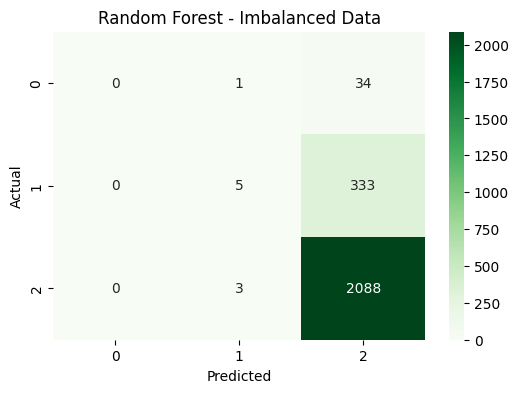

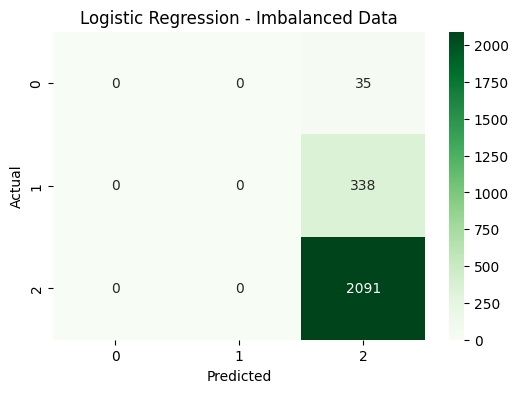

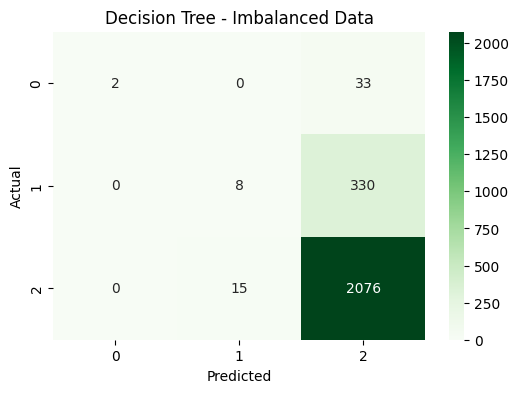

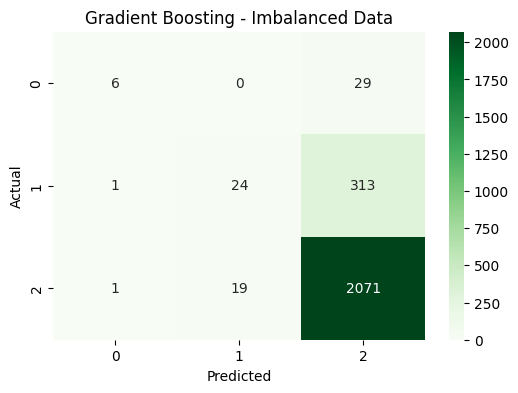

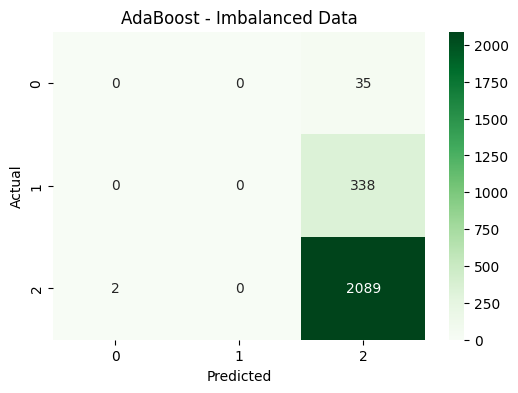

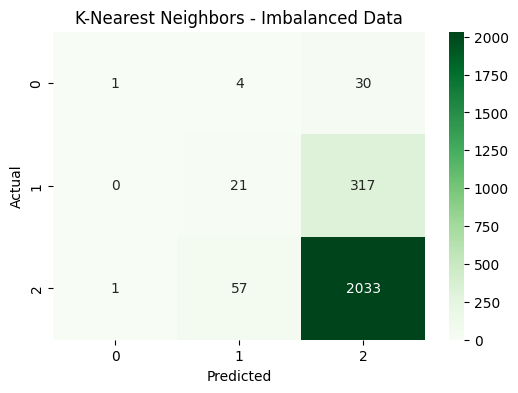

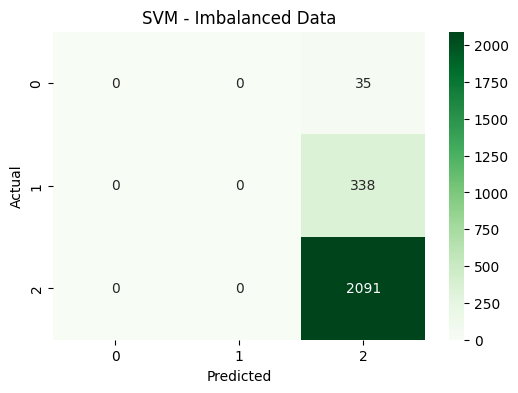

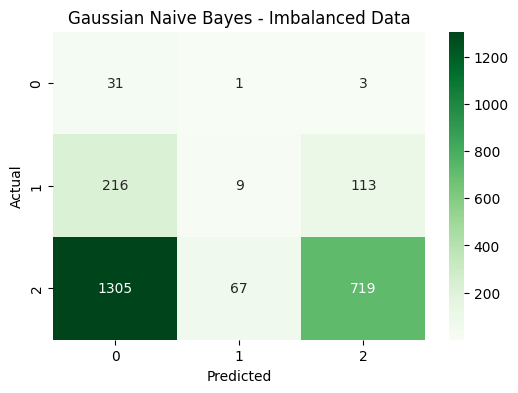

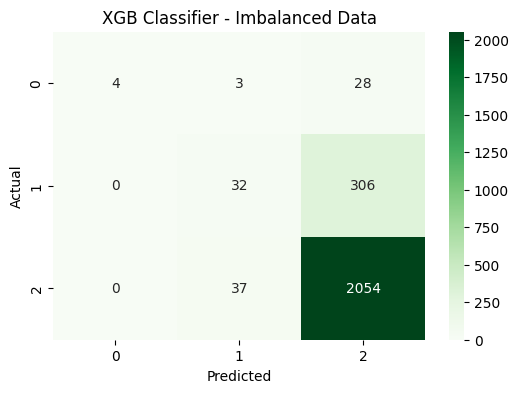

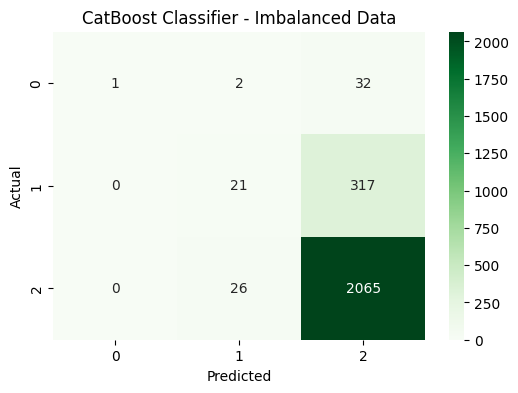

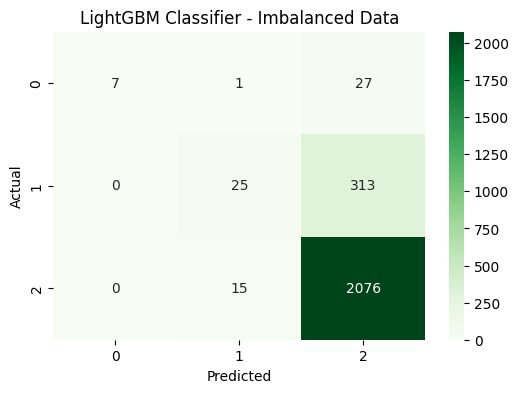

Confusion Matrices for Balanced Data:


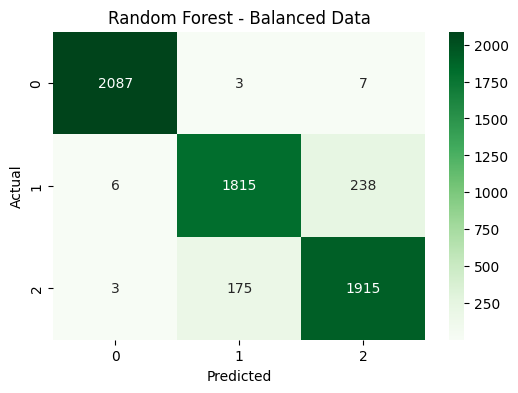

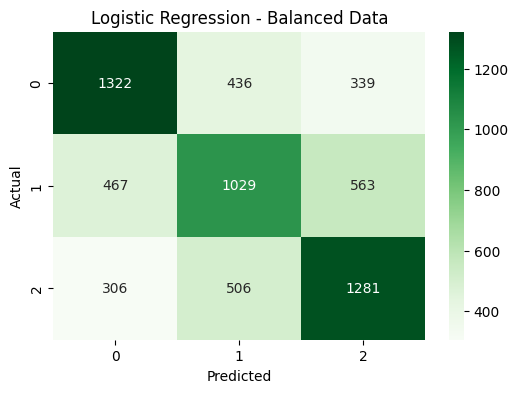

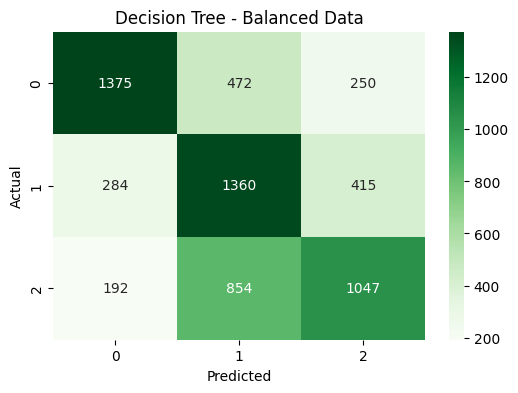

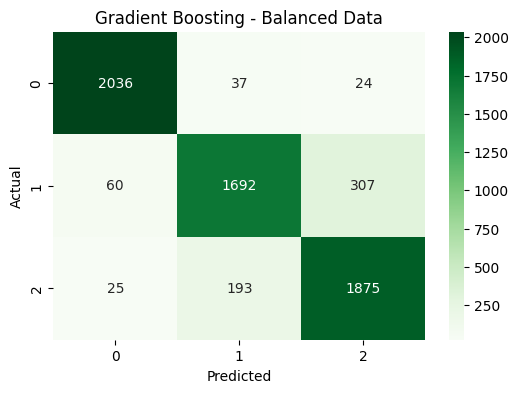

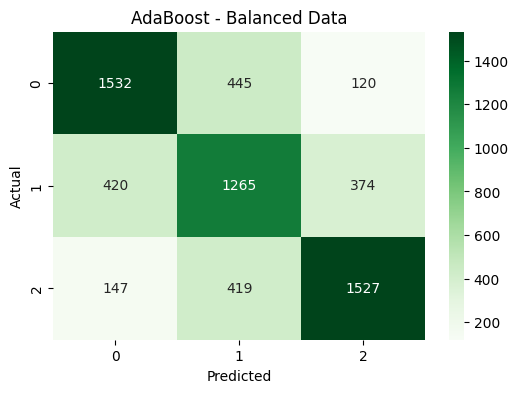

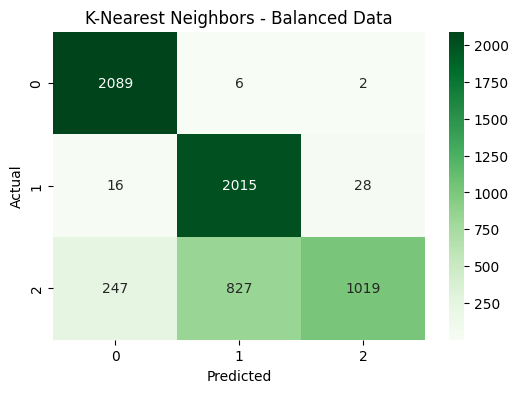

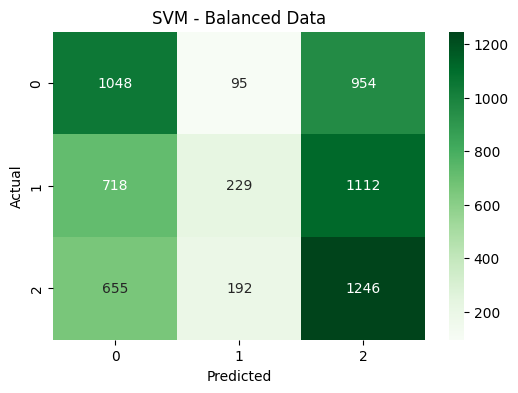

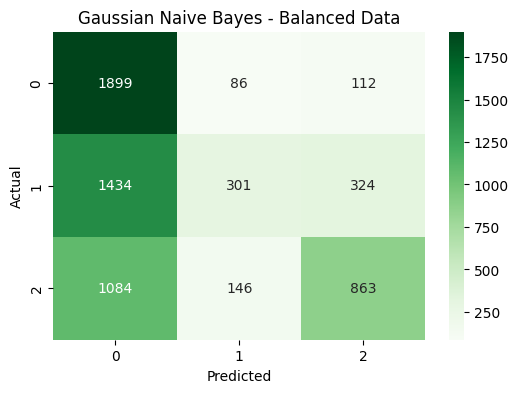

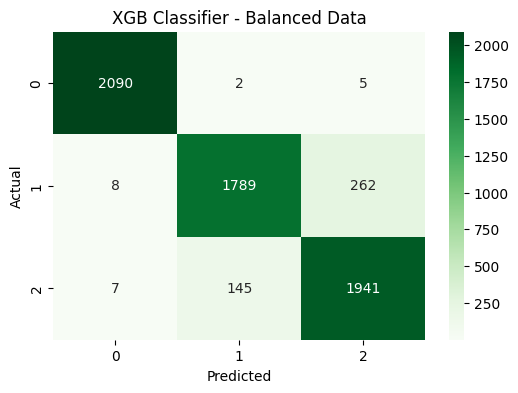

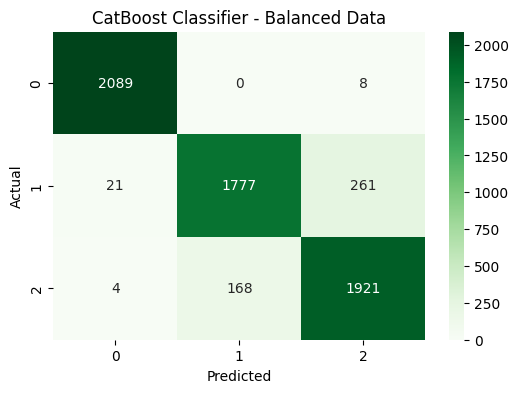

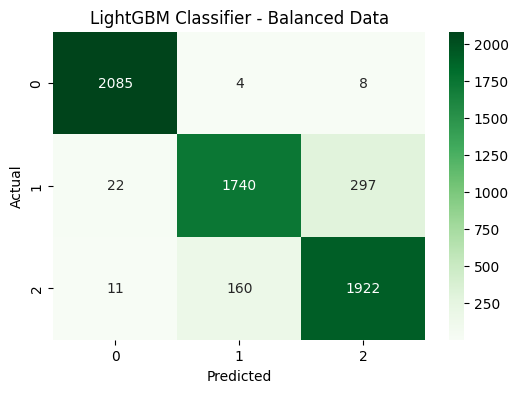


Comparison Table:
                   Model  Accuracy (Imbalanced)  Accuracy (Balanced)  \
0          Random Forest               0.849432             0.930869   
1    Logistic Regression               0.848620             0.581213   
2          Decision Tree               0.846591             0.605217   
3      Gradient Boosting               0.852679             0.896623   
4               AdaBoost               0.847808             0.691951   
5    K-Nearest Neighbors               0.834010             0.819811   
6                    SVM               0.848620             0.403745   
7   Gaussian Naive Bayes               0.308036             0.490158   
8         XGB Classifier               0.848214             0.931349   
9    CatBoost Classifier               0.846997             0.926068   
10   LightGBM Classifier               0.855519             0.919667   

    F1 Score (Imbalanced)  F1 Score (Balanced)  Precision (Imbalanced)  \
0                0.783504             0.93

In [23]:
# Plot confusion matrices for all models

for dataset_type in confusion_matrices:
    print(f"Confusion Matrices for {dataset_type} Data:")
    for model_name, cm in confusion_matrices[dataset_type].items():
        plot_confusion_matrix(cm, f'{model_name} - {dataset_type} Data')
# Display comparison table
comparison_df = pd.DataFrame(comparison_table)
print("\nComparison Table:")
print(comparison_df)

In [24]:

# Additional Accuracy Comparison Table
comparison = pd.DataFrame({
    "Model": [x['Model'] for x in comparison_table],
    "Accuracy (Imbalanced)": [x['Accuracy (Imbalanced)'] for x in comparison_table],
    "Accuracy (Balanced)": [x['Accuracy (Balanced)'] for x in comparison_table],
    "F1 Score (Balanced)": [x['F1 Score (Balanced)'] for x in comparison_table],
    "Precision (Balanced)": [x['Precision (Balanced)'] for x in comparison_table],
    "Recall (Balanced)": [x['Recall (Balanced)'] for x in comparison_table]
})
print("\nAdditional Accuracy Comparison Table:")
print(comparison)



Additional Accuracy Comparison Table:
                   Model  Accuracy (Imbalanced)  Accuracy (Balanced)  \
0          Random Forest               0.849432             0.930869   
1    Logistic Regression               0.848620             0.581213   
2          Decision Tree               0.846591             0.605217   
3      Gradient Boosting               0.852679             0.896623   
4               AdaBoost               0.847808             0.691951   
5    K-Nearest Neighbors               0.834010             0.819811   
6                    SVM               0.848620             0.403745   
7   Gaussian Naive Bayes               0.308036             0.490158   
8         XGB Classifier               0.848214             0.931349   
9    CatBoost Classifier               0.846997             0.926068   
10   LightGBM Classifier               0.855519             0.919667   

    F1 Score (Balanced)  Precision (Balanced)  Recall (Balanced)  
0              0.930852      